In [1177]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [1178]:
data=pd.read_csv('./data/cardekho_Extract.csv')
data.head()

,Source.Name,web-scraper-order,web-scraper-start-url,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,cardekho_extract(0-2000).csv,1611917819-1662,https://www.cardekho.com/used-car-details/used...,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,cardekho_extract(0-2000).csv,1611918361-1902,https://www.cardekho.com/used-car-details/used...,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,cardekho_extract(0-2000).csv,1611917012-1306,https://www.cardekho.com/used-car-details/used...,Hyundai i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,cardekho_extract(0-2000).csv,1611917695-1607,https://www.cardekho.com/used-car-details/used...,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,cardekho_extract(0-2000).csv,1611914861-367,https://www.cardekho.com/used-car-details/used...,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [1179]:
lables=['Source.Name','web-scraper-order','web-scraper-start-url']
data.drop(labels=lables,axis=1,inplace=True)
data.head()

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [1180]:
data.isnull().sum()

full_name               46
selling_price           46
new-price            10460
year                    46
seller_type             46
km_driven               46
owner_type              46
fuel_type               46
transmission_type       46
mileage                 46
engine                 105
max_power              105
seats                  173
dtype: int64

In [1181]:
data.dropna(subset=['full_name', 'selling_price', 'year', 'seller_type','km_driven', 'fuel_type', 'transmission_type', 'mileage', 'engine','max_power', 'seats'],how='any',axis=0, inplace=True)
data = data.rename(columns={"new-price":"new_price"})
data.shape

(19853, 13)

In [1182]:
dataset_year=2021
data['vehicle_age'] = dataset_year - data['year']
data.drop(['year'],axis=1, inplace=True)

data.head(1)

,full_name,selling_price,new_price,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age
0,Maruti Alto Std,1.2 Lakh*,NaN,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,9.0


In [1183]:
# Creating brand
data["full_name"] = data["full_name"].str.replace(" New ", " ")
data['brand']=data.full_name.str.split(' ').str.get(0)
data.loc[(data.brand == 'Land'),'brand']='Land Rover'

# Creating model
data['model']=data['full_name'].apply(lambda x: ' '.join(x.split(' ')[1:3]) if 'Dzire' in x else ''.join(x.split(' ')[1]))

In [1184]:
# Renaming car models

data.loc[(data.model == 'Wagon'),'model'] = 'Wagon R'
data.loc[(data.model == 'E'),'model'] = 'E Verito'
data.loc[(data.model == 'Land'),'model'] = 'Land Cruiser'

In [1185]:
# Dropping "full_name"

data.drop('full_name',axis = 1, inplace=True)

In [1186]:
# Creating column "car_name"

data['car_name'] = data["brand"] +" "+ data["model"]
data_unique= pd.DataFrame(data['car_name'].value_counts())
data.head(1)

,selling_price,new_price,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age,brand,model,car_name
0,1.2 Lakh*,NaN,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,9.0,Maruti,Alto,Maruti Alto


In [1187]:
data['selling_price']

0          1.2 Lakh*
1          5.5 Lakh*
2         2.15 Lakh*
3         2.26 Lakh*
4          5.7 Lakh*
            ...     
20021      6.5 Lakh*
20022     9.25 Lakh*
20023     4.25 Lakh*
20024    12.25 Lakh*
20025       12 Lakh*
Name: selling_price, Length: 19853, dtype: object

In [1188]:
data['new_price1']=data['new_price'].str.lstrip('New Car (On-Road Price) : Rs.')
data.new_price1 = data.new_price1.str.replace('[*,,]', '')

data[['new_price1','unit']] = data.new_price1.str.split(" ",expand=True)

data[['min_cost_price','max_cost_price']] = data.new_price1.str.split("-",expand=True)
data.min_cost_price = data.min_cost_price.str.replace('[A-Za-z]', '')
data.max_cost_price = data.max_cost_price.str.replace('[A-Za-z]', '')

data.drop(['new_price1'],axis=1)
data.head(1)

<ipython-input-1188-7c9edc904862>:2: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-1188-7c9edc904862>:7: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-1188-7c9edc904862>:8: FutureWarning:

The default value of regex will change from True to False in a future version.



,selling_price,new_price,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age,brand,model,car_name,new_price1,unit,min_cost_price,max_cost_price
0,1.2 Lakh*,NaN,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,9.0,Maruti,Alto,Maruti Alto,NaN,NaN,NaN,NaN


In [1189]:
data['max_cost_price'] = data['max_cost_price'].astype('float64', errors = 'raise')
data['min_cost_price'] = data['min_cost_price'].astype('float64', errors = 'raise')

In [1190]:
data.loc[data.unit == "Lakh", 'min_cost_price'] = data['min_cost_price']*100000.0
data.loc[data.unit == "Lakh", 'max_cost_price'] = data['max_cost_price']*100000.0

data.loc[data.unit == "Cr", 'min_cost_price'] = data['min_cost_price']*10000000.0
data.loc[data.unit == "Cr", 'max_cost_price'] = data['max_cost_price']*10000000.0

data.drop(['unit','new_price1'],axis=1, inplace=True)

In [1191]:
# Filling cars whose "max_cost_price" is missing with "min_cost_price"

data['max_cost_price'] = data['max_cost_price'].fillna(data['min_cost_price'])
data.drop(data[(data['max_cost_price'])==(data['min_cost_price'])].index, inplace=True)


In [1192]:
#Filling missing cost price of cars with the mean of their respective car models

data['min_cost_price'] = data['min_cost_price'].fillna(data.groupby(['car_name'])['min_cost_price'].transform('mean'))
data['max_cost_price'] = data['max_cost_price'].fillna(data.groupby(['car_name'])['max_cost_price'].transform('mean'))

In [1193]:
data.selling_price = data.selling_price.str.replace('[*,,]', '')
data[['selling_price','unit']] = data.selling_price.str.split(expand=True)
data['selling_price'] = data['selling_price'].astype('float64', errors = 'raise')

<ipython-input-1193-08772997fc7b>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [1194]:
data.loc[data.unit == "Lakh", 'selling_price'] = data['selling_price']*100000.0
data.loc[data.unit == "Cr", 'selling_price'] = data['selling_price']*10000000.0


data=data.drop(['unit','new_price'],axis=1)

data.head()

,selling_price,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age,brand,model,car_name,min_cost_price,max_cost_price
0,120000.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,9.0,Maruti,Alto,Maruti Alto,3.570039e+05,4.654015e+05
1,550000.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,5.0,Hyundai,Grand,Hyundai Grand,7.110000e+05,7.480000e+05
2,215000.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,11.0,Hyundai,i20,Hyundai i20,8.540829e+05,1.307926e+06
3,226000.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,9.0,Maruti,Alto,Maruti Alto,3.570039e+05,4.654015e+05
4,570000.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,6.0,Ford,Ecosport,Ford Ecosport,1.014000e+06,1.379000e+06


In [1195]:
rep_cols = [ "mileage","km_driven","engine","max_power","seats"]
data[rep_cols] = data[rep_cols].replace(r'[^\d.]+', '', regex=True)
data[rep_cols]= data[rep_cols].replace('', '0', regex=True)

In [1196]:
# Dropping null values
data.dropna(how='any',axis=0, inplace=True)

# Changing datatype to float
data= data.astype({'km_driven': 'float64', 'mileage': 'float64', 'engine': 'float64', 'max_power': 'float64', 'seats': 'float64','min_cost_price': 'float64','max_cost_price': 'float64'})
print(data.dtypes)

selling_price        float64
seller_type           object
km_driven            float64
owner_type            object
fuel_type             object
transmission_type     object
mileage              float64
engine               float64
max_power            float64
seats                float64
vehicle_age          float64
brand                 object
model                 object
car_name              object
min_cost_price       float64
max_cost_price       float64
dtype: object


In [1197]:
# Reordering columns

col_order=['car_name','brand','model','min_cost_price','max_cost_price','vehicle_age','km_driven','seller_type','fuel_type','transmission_type','mileage','engine','max_power','seats','selling_price']
data=data[col_order]
data.head(1)

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,357003.861004,465401.544402,9.0,120000.0,Individual,Petrol,Manual,19.7,796.0,46.3,5.0,120000.0


In [1198]:
data.describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,1.517000e+04,1.517000e+04,15170.000000,1.517000e+04,15170.000000,15170.000000,15170.000000,15170.000000,1.517000e+04
mean,5.840919e+06,1.853701e+06,6.104153,5.582815e+04,19.630485,1463.108372,97.627362,5.315425,7.306994e+05
std,5.714293e+07,2.782230e+06,3.099376,5.232415e+04,4.465619,503.553337,40.767167,0.797257,8.224479e+05
min,3.110000e+05,4.360000e+05,0.000000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,2.500000e+04
25%,6.530000e+05,8.450000e+05,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.750000e+05
50%,8.500000e+05,1.208000e+06,6.000000,5.000000e+04,19.700000,1248.000000,88.500000,5.000000,5.500000e+05
75%,1.262000e+06,1.707450e+06,8.000000,7.032725e+04,22.700000,1582.000000,110.400000,5.000000,7.950000e+05
max,9.880000e+08,9.110000e+07,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [1199]:
# Dropping zero valued cells

data.drop(data[data['seats'] == 0].index, inplace = True)
data.drop(data[data['mileage'] == 0].index, inplace = True)
data.drop(data[data['km_driven'] == 0].index, inplace = True)
data.drop(data[data['vehicle_age'] == 0].index, inplace = True)
data.drop(data[data['max_power'] == 0].index, inplace = True)

In [1200]:
# Dropping out of boundary values

data.drop(data[(data['vehicle_age'] > 20) ].index, inplace = True)
data.drop(data[data['km_driven'] >300000 ].index, inplace = True)

In [1201]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

out_columns = data[['km_driven','vehicle_age','mileage','engine','max_power','seats','selling_price','min_cost_price','max_cost_price']]  
for i in out_columns:
    removeOutliers(data, i)
  
# Assigning filtered data back to our original variable'

data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)

IQR value for column km_driven is: 40000.0
IQR value for column vehicle_age is: 4.0
IQR value for column mileage is: 5.699999999999999
IQR value for column engine is: 385.0
IQR value for column max_power is: 39.400000000000006
IQR value for column seats is: 0.0
IQR value for column selling_price is: 419000.0
IQR value for column min_cost_price is: 605000.0
IQR value for column max_cost_price is: 852650.4643962849
Shape of data after outlier removal is:  (13478, 15)


In [1202]:
data['avg_cost_price']=(data['min_cost_price']+data['max_cost_price'])/2

In [1203]:
data=data.drop(['min_cost_price','max_cost_price'], axis=1)

In [1204]:
data['avg_cost_price']=data['avg_cost_price']/100000
data['selling_price']=data['selling_price']/100000

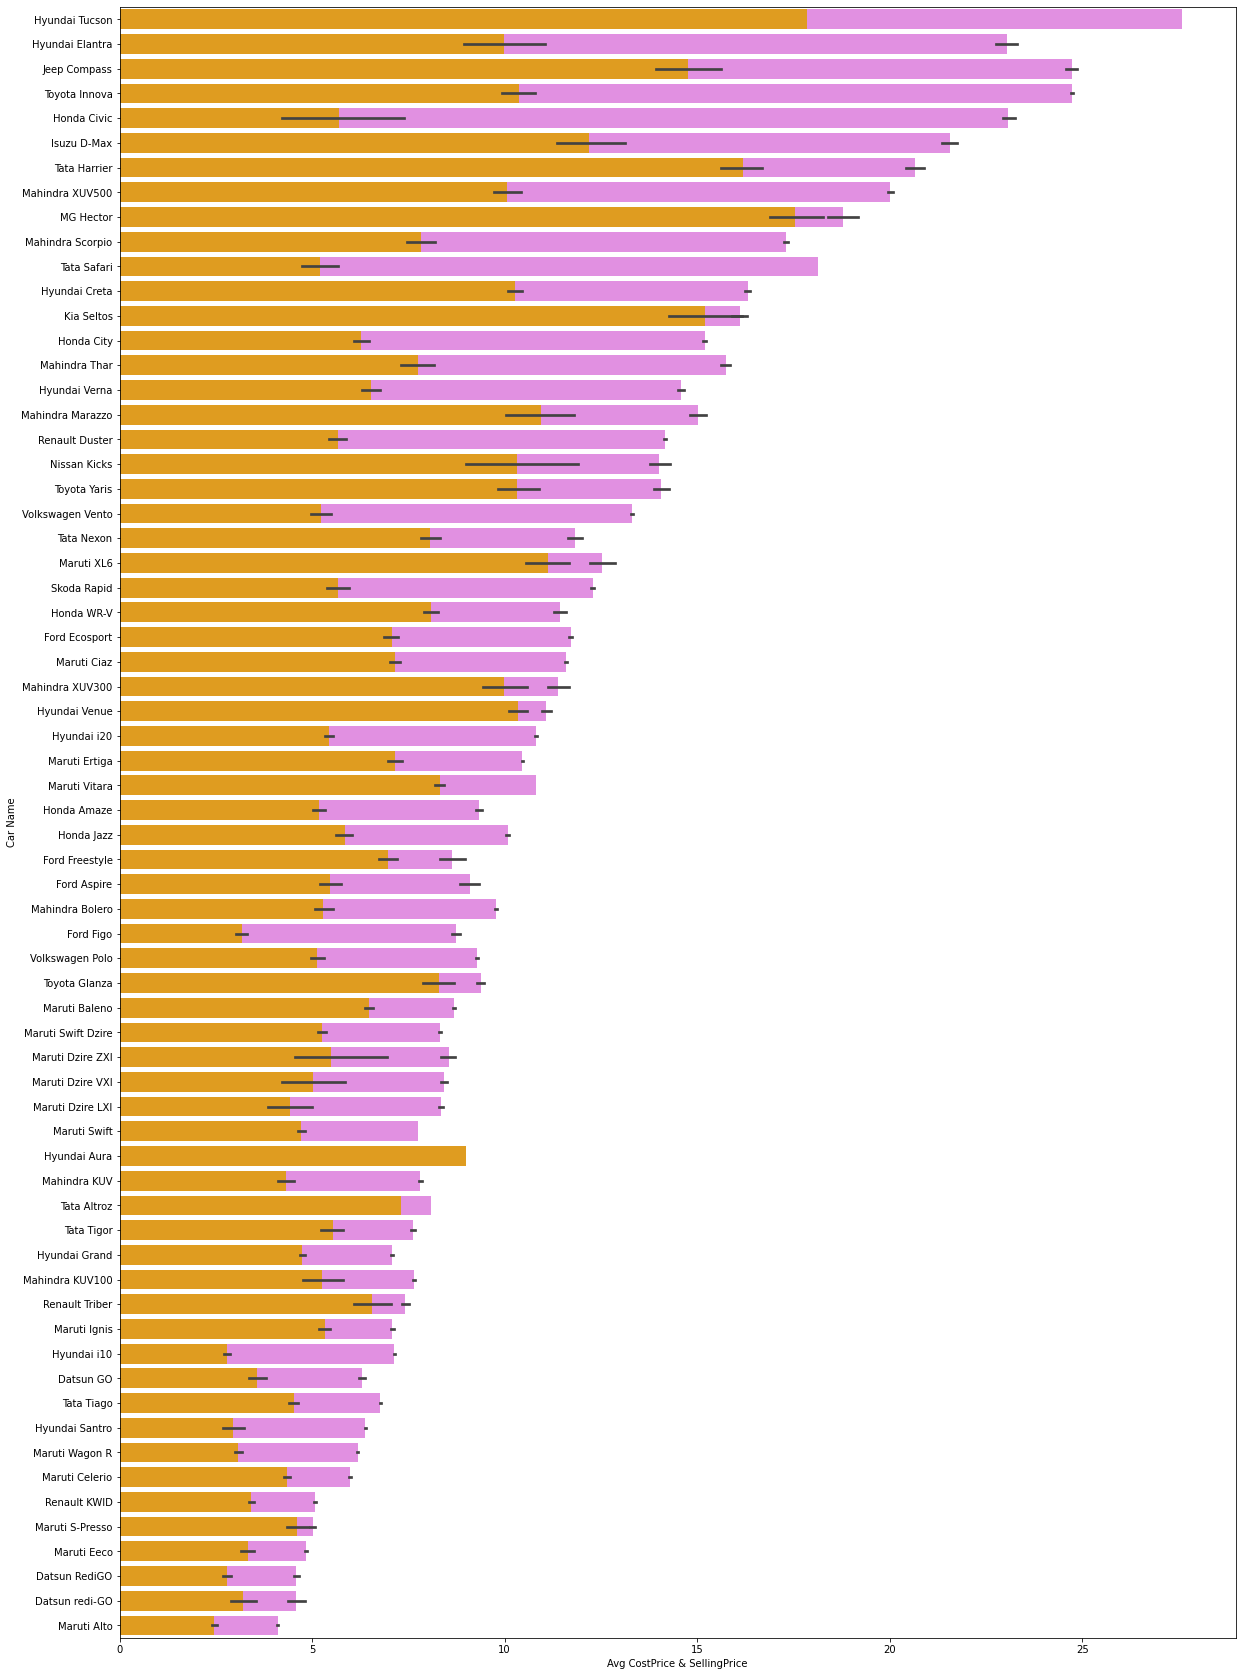

In [1205]:
top_sell = data.sort_values(by='avg_cost_price', ascending=False)

ax = plt.subplots(figsize=(20,30))
  
# plotting columns
ax = sns.barplot(x=top_sell.avg_cost_price, y=top_sell.car_name, color='violet')
ax = sns.barplot(x=top_sell.selling_price, y=top_sell.car_name,color='orange')
  
# renaming the axes
ax.set(xlabel="Avg CostPrice & SellingPrice", ylabel="Car Name")
  
# visulaizing illustration
plt.show()

In [1206]:
# Dropping Hyundai Aura Hyundai Aura
data.drop(data[data['car_name']=='Hyundai Aura'].index, axis=0,  inplace=True,)

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

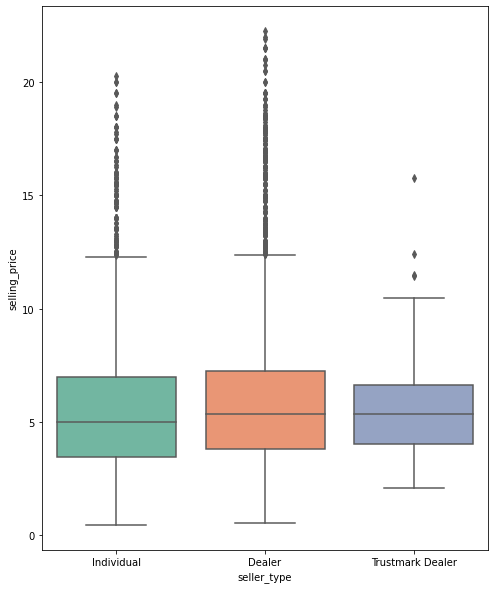

In [1207]:
figure = plt.figure(figsize=(8,10))
sns.boxplot(x='seller_type',y='selling_price', data=data, palette="Set2")

<AxesSubplot:xlabel='seller_type', ylabel='count'>

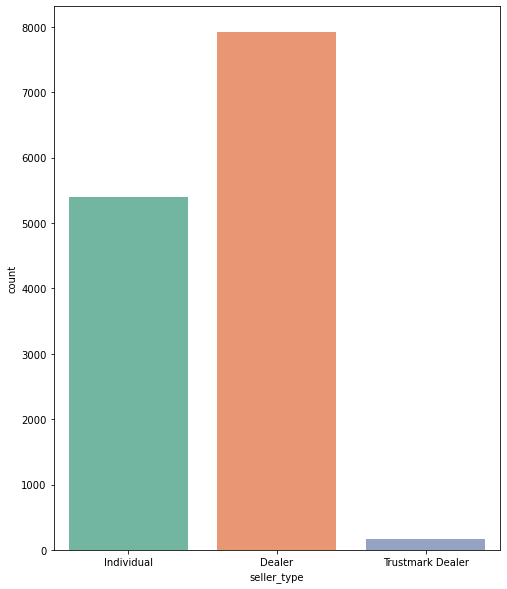

In [1208]:
figure = plt.figure(figsize=(8,10))
sns.countplot(x='seller_type', data=data, palette="Set2")

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

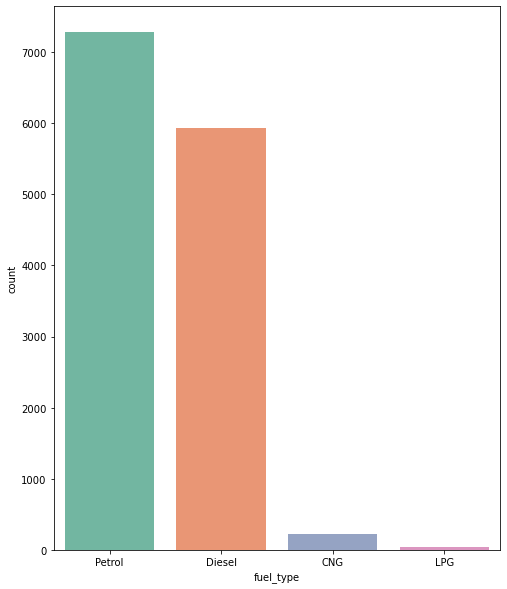

In [1209]:
figure = plt.figure(figsize=(8,10))
sns.countplot(x='fuel_type', data=data, palette="Set2")

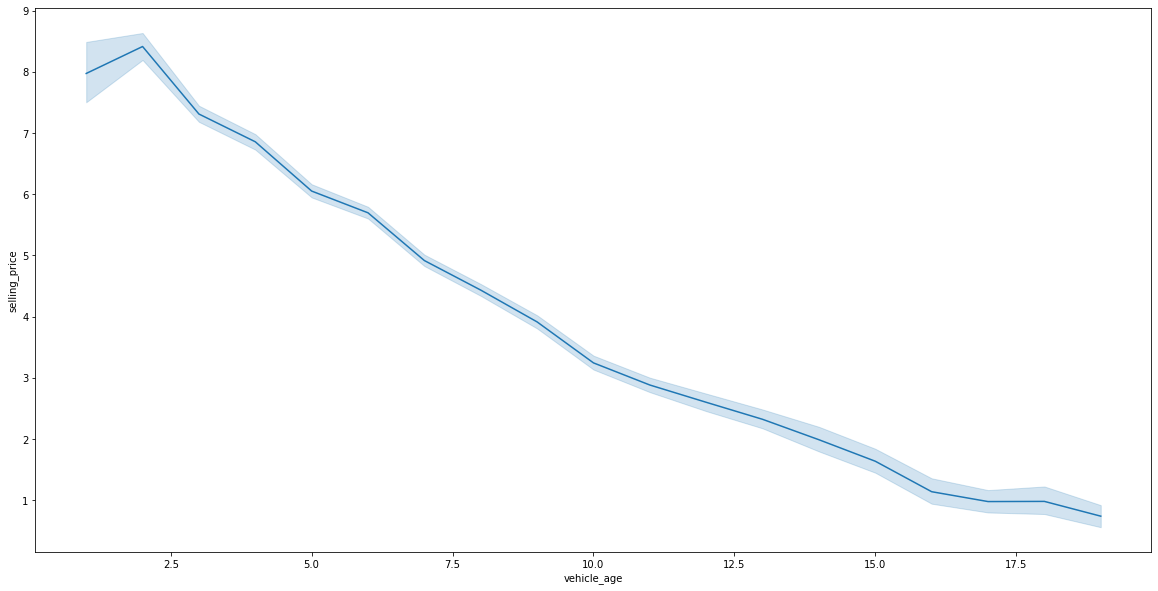

In [1210]:
plt.figure(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=data)
plt.ticklabel_format(style='plain')

In [1211]:
plt.figure(figsize=(40,40))
fig = px.scatter_3d(data, x='vehicle_age', y='km_driven', z='selling_price', color='brand')
fig.show()

<Figure size 2880x2880 with 0 Axes>

In [1212]:
data=data.drop(['car_name'], axis=1)
data.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
0,Maruti,Alto,9.0,120000.0,Individual,Petrol,Manual,19.70,796.0,46.30,5.0,1.20,4.112027
1,Hyundai,Grand,5.0,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,5.50,7.295000
2,Hyundai,i20,11.0,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5.0,2.15,10.810042
3,Maruti,Alto,9.0,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5.0,2.26,4.112027
4,Ford,Ecosport,6.0,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,5.70,11.965000


In [1213]:
data.head()
data.to_csv('CleanData.csv')

In [1214]:
Y=data.selling_price
Y

0         1.20
1         5.50
2         2.15
3         2.26
4         5.70
         ...  
20018     5.45
20019     2.50
20022     9.25
20023     4.25
20025    12.00
Name: selling_price, Length: 13477, dtype: float64

In [1215]:
X=data.drop('selling_price',axis=1)
X

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,avg_cost_price
0,Maruti,Alto,9.0,120000.0,Individual,Petrol,Manual,19.70,796.0,46.30,5.0,4.112027
1,Hyundai,Grand,5.0,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,7.295000
2,Hyundai,i20,11.0,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5.0,10.810042
3,Maruti,Alto,9.0,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5.0,4.112027
4,Ford,Ecosport,6.0,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,11.965000
...,...,...,...,...,...,...,...,...,...,...,...,...
20018,Hyundai,Grand,5.0,9229.0,Dealer,Petrol,Manual,18.90,1197.0,82.00,5.0,7.071195
20019,Hyundai,i10,9.0,10723.0,Dealer,Petrol,Manual,19.81,1086.0,68.05,5.0,7.138267
20022,Maruti,Ertiga,2.0,18000.0,Dealer,Petrol,Manual,17.50,1373.0,91.10,7.0,10.457892
20023,Skoda,Rapid,6.0,67000.0,Dealer,Diesel,Manual,21.14,1498.0,103.52,5.0,12.280918


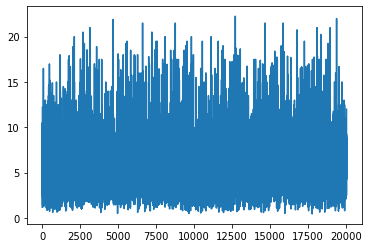

In [1216]:
#Outlier Detection
plt.plot(Y)

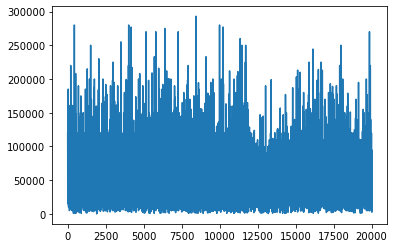

In [1217]:
#Outlier Detection
plt.plot(X.km_driven)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

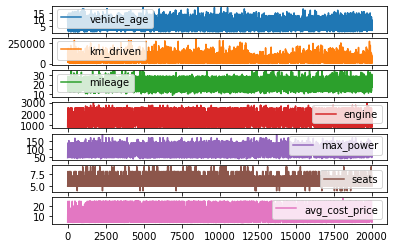

In [1218]:
X.plot(subplots=True,legend=True)

In [1219]:
for column in X:
    if(X[column].dtype=='object'):
        print(f'{column} : {len(X[column].unique())}')

brand : 16
model : 65
seller_type : 3
fuel_type : 4
transmission_type : 2


In [1220]:
X.shape

(13477, 12)

In [1221]:
X.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [1222]:
X.seller_type.replace({'Individual':0,'Dealer':1, 'Trustmark Dealer':2},inplace=True)
X.seller_type.unique()

array([0, 1, 2], dtype=int64)

In [1223]:
X.fuel_type.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [1224]:
X.fuel_type.replace({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3},inplace=True)
X.fuel_type.unique()

array([0, 1, 2, 3], dtype=int64)

In [1225]:
X.transmission_type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [1226]:
X.transmission_type.replace({'Manual':0, 'Automatic':1},inplace=True)
X.transmission_type.unique()

array([0, 1], dtype=int64)

In [1227]:
X.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,avg_cost_price
0,Maruti,Alto,9.0,120000.0,0,0,0,19.70,796.0,46.30,5.0,4.112027
1,Hyundai,Grand,5.0,20000.0,0,0,0,18.90,1197.0,82.00,5.0,7.295000
2,Hyundai,i20,11.0,60000.0,0,0,0,17.00,1197.0,80.00,5.0,10.810042
3,Maruti,Alto,9.0,37000.0,0,0,0,20.92,998.0,67.10,5.0,4.112027
4,Ford,Ecosport,6.0,30000.0,1,1,0,22.77,1498.0,98.59,5.0,11.965000


In [1228]:
brd=X.brand.unique()
dic={}
c=0
for i in brd:
    dic[i]=c
    c+=1
X.brand.replace(dic,inplace=True)
X

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,avg_cost_price
0,0,Alto,9.0,120000.0,0,0,0,19.70,796.0,46.30,5.0,4.112027
1,1,Grand,5.0,20000.0,0,0,0,18.90,1197.0,82.00,5.0,7.295000
2,1,i20,11.0,60000.0,0,0,0,17.00,1197.0,80.00,5.0,10.810042
3,0,Alto,9.0,37000.0,0,0,0,20.92,998.0,67.10,5.0,4.112027
4,2,Ecosport,6.0,30000.0,1,1,0,22.77,1498.0,98.59,5.0,11.965000
...,...,...,...,...,...,...,...,...,...,...,...,...
20018,1,Grand,5.0,9229.0,1,0,0,18.90,1197.0,82.00,5.0,7.071195
20019,1,i10,9.0,10723.0,1,0,0,19.81,1086.0,68.05,5.0,7.138267
20022,0,Ertiga,2.0,18000.0,1,0,0,17.50,1373.0,91.10,7.0,10.457892
20023,13,Rapid,6.0,67000.0,1,1,0,21.14,1498.0,103.52,5.0,12.280918


In [1237]:
brd

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Toyota', 'Volkswagen',
       'Honda', 'Mahindra', 'Datsun', 'Tata', 'Kia', 'MG', 'Isuzu',
       'Skoda', 'Nissan', 'Jeep'], dtype=object)

In [1229]:
for i in dic:
    v=dic[i]/15.0
    print(f"'{i}' : {v},")

'Maruti' : 0.0,
'Hyundai' : 0.06666666666666667,
'Ford' : 0.13333333333333333,
'Renault' : 0.2,
'Toyota' : 0.26666666666666666,
'Volkswagen' : 0.3333333333333333,
'Honda' : 0.4,
'Mahindra' : 0.4666666666666667,
'Datsun' : 0.5333333333333333,
'Tata' : 0.6,
'Kia' : 0.6666666666666666,
'MG' : 0.7333333333333333,
'Isuzu' : 0.8,
'Skoda' : 0.8666666666666667,
'Nissan' : 0.9333333333333333,
'Jeep' : 1.0,


In [ ]:
modl

In [1230]:
modl=X.model.unique()
dic={}
c=0
for i in modl:
    dic[i]=c
    c+=1
X.model.replace(dic,inplace=True)
X

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,avg_cost_price
0,0,0,9.0,120000.0,0,0,0,19.70,796.0,46.30,5.0,4.112027
1,1,1,5.0,20000.0,0,0,0,18.90,1197.0,82.00,5.0,7.295000
2,1,2,11.0,60000.0,0,0,0,17.00,1197.0,80.00,5.0,10.810042
3,0,0,9.0,37000.0,0,0,0,20.92,998.0,67.10,5.0,4.112027
4,2,3,6.0,30000.0,1,1,0,22.77,1498.0,98.59,5.0,11.965000
...,...,...,...,...,...,...,...,...,...,...,...,...
20018,1,1,5.0,9229.0,1,0,0,18.90,1197.0,82.00,5.0,7.071195
20019,1,5,9.0,10723.0,1,0,0,19.81,1086.0,68.05,5.0,7.138267
20022,0,38,2.0,18000.0,1,0,0,17.50,1373.0,91.10,7.0,10.457892
20023,13,45,6.0,67000.0,1,1,0,21.14,1498.0,103.52,5.0,12.280918


In [1231]:
for i in dic:
    v=dic[i]/64.0
    print(f"'{i}' : {v},")

'Alto' : 0.0,
'Grand' : 0.015625,
'i20' : 0.03125,
'Ecosport' : 0.046875,
'Wagon R' : 0.0625,
'i10' : 0.078125,
'Venue' : 0.09375,
'Swift' : 0.109375,
'Verna' : 0.125,
'Duster' : 0.140625,
'Ciaz' : 0.15625,
'Innova' : 0.171875,
'Baleno' : 0.1875,
'Swift Dzire' : 0.203125,
'Vento' : 0.21875,
'Creta' : 0.234375,
'City' : 0.25,
'Bolero' : 0.265625,
'KWID' : 0.28125,
'Amaze' : 0.296875,
'Santro' : 0.3125,
'XUV500' : 0.328125,
'KUV100' : 0.34375,
'Ignis' : 0.359375,
'RediGO' : 0.375,
'Scorpio' : 0.390625,
'Marazzo' : 0.40625,
'Aspire' : 0.421875,
'Figo' : 0.4375,
'Vitara' : 0.453125,
'Tiago' : 0.46875,
'Polo' : 0.484375,
'Seltos' : 0.5,
'Celerio' : 0.515625,
'GO' : 0.53125,
'KUV' : 0.546875,
'Jazz' : 0.5625,
'Tigor' : 0.578125,
'Ertiga' : 0.59375,
'Safari' : 0.609375,
'Thar' : 0.625,
'Eeco' : 0.640625,
'Hector' : 0.65625,
'Civic' : 0.671875,
'D-Max' : 0.6875,
'Rapid' : 0.703125,
'Freestyle' : 0.71875,
'Nexon' : 0.734375,
'XUV300' : 0.75,
'Dzire VXI' : 0.765625,
'WR-V' : 0.78125,
'XL6' : 0.7

In [1232]:
X.seller_type.unique()

array([0, 1, 2], dtype=int64)

In [1233]:
X.seller_type.replace({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2},inplace=True)
X.seller_type.unique()

array([0, 1, 2], dtype=int64)

In [1234]:
X.dtypes

brand                  int64
model                  int64
vehicle_age          float64
km_driven            float64
seller_type            int64
fuel_type              int64
transmission_type      int64
mileage              float64
engine               float64
max_power            float64
seats                float64
avg_cost_price       float64
dtype: object

In [1236]:
print(max(X['vehicle_age']))
print(max(X['mileage']))
print(max(X['engine']))
print(max(X['km_driven']))
print(max(X['max_power']))
print(max(X['seats']))
print(max(X['avg_cost_price']))

19.0
33.54
2956.0
293000.0
189.0
9.0
0         4.112027
1         7.295000
2        10.810042
3         4.112027
4        11.965000
           ...    
20018     7.071195
20019     7.138267
20022    10.457892
20023    12.280918
20025    15.192461
Name: avg_cost_price, Length: 13477, dtype: float64


In [1097]:
columns_to_scale=['vehicle_age','seller_type','km_driven','avg_cost_price','fuel_type','transmission_type','mileage','engine','max_power','seats','brand','model']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[columns_to_scale]=scaler.fit_transform(X[columns_to_scale])
X.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,avg_cost_price
0,0.000000,0.000000,0.444444,0.409355,0.0,0.000000,0.0,0.436023,0.001387,0.052457,0.2,0.012696
1,0.066667,0.015625,0.222222,0.067941,0.0,0.000000,0.0,0.403423,0.186778,0.289509,0.2,0.146490
2,0.066667,0.031250,0.555556,0.204507,0.0,0.000000,0.0,0.325998,0.186778,0.276228,0.2,0.294243
3,0.000000,0.000000,0.444444,0.125982,0.0,0.000000,0.0,0.485738,0.094776,0.190571,0.2,0.012696
4,0.133333,0.046875,0.277778,0.102083,0.5,0.333333,0.0,0.561125,0.325936,0.399668,0.2,0.342791


In [1098]:
Y.head()

0    1.20
1    5.50
2    2.15
3    2.26
4    5.70
Name: selling_price, dtype: float64

In [1099]:
p=max(Y)
print(p)
new=[]
for i in Y:
    v=i/p
    new+=[v]
selling_price=new
data = {'selling_price':new}
Y = pd.DataFrame(data)
Y.head()

22.25


,selling_price
0,0.053933
1,0.247191
2,0.096629
3,0.101573
4,0.256180


In [1100]:
X.shape

(13477, 12)

In [1101]:
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=5)
Y_test.head()

,selling_price
6940,0.400000
2060,0.537079
4046,0.202247
11437,0.382022
1432,0.584270


In [1102]:
X_test.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,avg_cost_price
6940,0.400000,0.781250,0.166667,0.074770,0.5,0.333333,0.0,0.672372,0.325936,0.399734,0.2,0.359185
2060,0.266667,0.171875,0.333333,0.115739,0.5,0.333333,0.0,0.162592,0.786408,0.413015,0.6,0.884336
4046,0.066667,0.015625,0.333333,0.105497,0.5,0.000000,0.0,0.403423,0.186778,0.289509,0.2,0.137083
11437,0.466667,0.390625,0.277778,0.163537,0.5,0.333333,0.0,0.260799,0.640777,0.541833,0.8,0.573350
1432,0.466667,0.328125,0.277778,0.375213,0.0,0.333333,0.0,0.285249,0.640777,0.674635,0.6,0.654056


In [1103]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(300,input_shape=(12,),activation='relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam',loss='mean_squared_error')

In [1104]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                         patience = 10, 
                                        restore_best_weights = True)
  
history = model.fit(X_train, Y_train, batch_size = 256, 
                    epochs = 200, validation_data =(X_test, Y_test), 
                    callbacks =[earlystopping])

Epoch 1/200
51/51 [==============================] - 1s 6ms/step - loss: 0.0088 - val_loss: 0.0023
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 11/

In [1105]:
min(history.history['loss'])

0.0014708967646583915

In [1106]:
model.evaluate(X_test,Y_test)

22/22 [==============================] - 0s 2ms/step - loss: 0.0015


0.0015051796799525619

In [1107]:
model.evaluate(X,Y)

422/422 [==============================] - 1s 1ms/step - loss: 0.0014


0.0014490809990093112

In [1108]:
X_test.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,avg_cost_price
6940,0.400000,0.781250,0.166667,0.074770,0.5,0.333333,0.0,0.672372,0.325936,0.399734,0.2,0.359185
2060,0.266667,0.171875,0.333333,0.115739,0.5,0.333333,0.0,0.162592,0.786408,0.413015,0.6,0.884336
4046,0.066667,0.015625,0.333333,0.105497,0.5,0.000000,0.0,0.403423,0.186778,0.289509,0.2,0.137083
11437,0.466667,0.390625,0.277778,0.163537,0.5,0.333333,0.0,0.260799,0.640777,0.541833,0.8,0.573350
1432,0.466667,0.328125,0.277778,0.375213,0.0,0.333333,0.0,0.285249,0.640777,0.674635,0.6,0.654056


In [1109]:
Y_test.head()

,selling_price
6940,0.400000
2060,0.537079
4046,0.202247
11437,0.382022
1432,0.584270


In [1110]:
res=model.predict(X_test)
res[50:60]*p

array([[ 4.086423 ],
       [ 5.274729 ],
       [ 4.556869 ],
       [ 6.194932 ],
       [11.923537 ],
       [ 2.4854655],
       [ 5.495823 ],
       [ 6.040594 ],
       [ 7.3413095],
       [ 2.2869852]], dtype=float32)

In [1111]:
Y_test[50:60]*p

,selling_price
136,5.30
6666,5.00
12991,4.35
5387,6.85
2684,10.85
3737,2.20
10383,5.99
7937,6.60
3653,10.35
7091,1.90


In [1112]:
#model.save("model.h5")

In [1113]:
model.load_weights('model.h5')